In [2]:
import cv2
import numpy as np 
import math # for tan
import matplotlib.pyplot as plt

#from PIL import Image # Python Imaging Library (Fork)

In [3]:
def calcmoments(img):
    # function to calculate moments
    moments = np.zeros(6, dtype=int) # Moments : [ m00, m01, m10, m11, m20, m02 ]
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if (img[y,x] & 128): # check if 7th bit is '1', it is set for all gray values >=128
                moments[0] += 1
                moments[1] += y
                moments[2] += x
                moments[3] += x*y
                moments[4] += x*x
                moments[5] += y*y
    
    return moments
    
    
def calcthetacXcY(m):
    # calculate cX,cY,theta of blob
    cxytheta = np.zeros(3, dtype=float) # cxytheta : [ cX, cY, theta ]
    cxytheta[0] = int(m[2]/m[0])
    cxytheta[1] = int(m[1]/m[0])
    mu20 = (m[4]/m[0])-cxytheta[0]**2
    mu11 = (m[3]/m[0])-cxytheta[0]*cxytheta[1]
    mu02 = (m[5]/m[0])-cxytheta[1]**2
    cxytheta[2] = 0.5 *  math.atan2( (2*mu11) , (mu20-mu02) )
    
    return cxytheta


Moments: m00: 15964 m01: 1773113 m10: 2281256 m11: 269670230 m20: 365332132 m02 215154207
Center X 142.00, Center Y 111.00, Angle clockwise 27.66°
Moments: m00: 15979 m01: 1704601 m10: 2337778 m11: 268749999 m20: 369586230 m02 211883899
Center X 146.00, Center Y 106.00, Angle clockwise 47.24°
Moments: m00: 15975 m01: 1662657 m10: 2398584 m11: 265651241 m20: 377952942 m02 212836887
Center X 150.00, Center Y 104.00, Angle clockwise 61.61°
Moments: m00: 15978 m01: 1634737 m10: 2560677 m11: 257510681 m20: 420299847 m02 214938043
Center X 160.00, Center Y 102.00, Angle clockwise -85.08°
Moments: m00: 15974 m01: 1677800 m10: 2674852 m11: 263372887 m20: 468465736 m02 213258504
Center X 167.00, Center Y 105.00, Angle clockwise -56.48°
Moments: m00: 15979 m01: 1787154 m10: 2773197 m11: 294464042 m20: 521555013 m02 217256650
Center X 173.00, Center Y 111.00, Angle clockwise -23.59°
Moments: m00: 15984 m01: 1883291 m10: 2800963 m11: 325751916 m20: 538609945 m02 231766647
Center X 175.00, Center Y

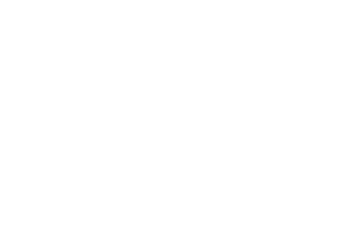

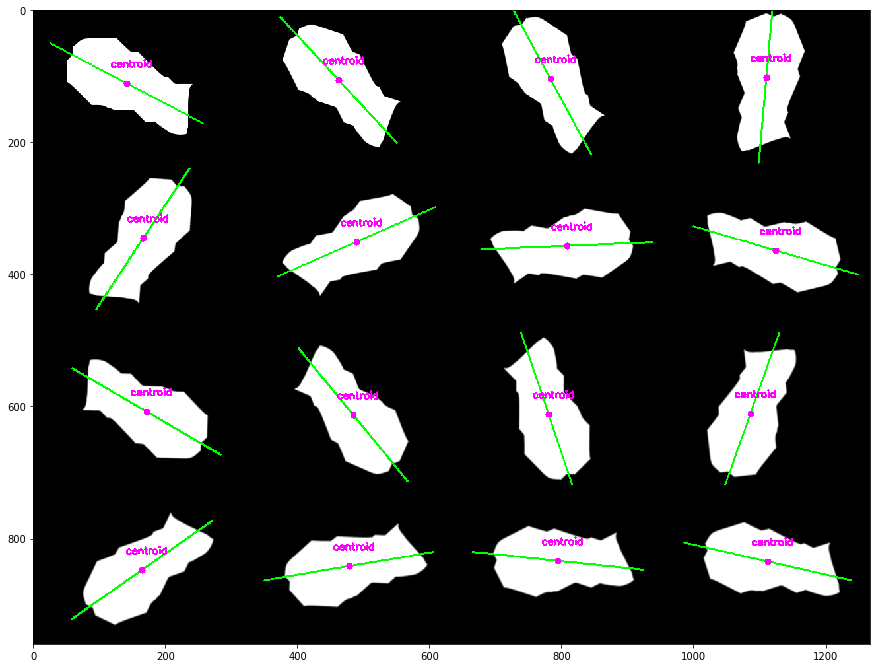

In [10]:
test = cv2.imread('pics/Block0.png',0)
tiles = 4
rows = test.shape[0]
cols = test.shape[1]
hugeImg = np.zeros( (4*rows, 4*cols, 3), np.uint8)
# print(hugeImg.shape)

# cv::Mat small_image;
# cv::Mat big_image;
# ...
# //Somehow fill small_image and big_image with your data
# ...
# small_image.copyTo(big_image(cv::Rect(x,y,small_image.cols, small_image.rows)));

for i in np.arange(16):
    img = cv2.imread('pics/Block'+str(i)+'.png',0)
    
    m = calcmoments(img) # Moments : [ m00, m01, m10, m11, m20, m02 ]
    #print("Moments: m00: {} m01: {} m10: {} m11: {} m20: {} m02 {}".format(m[0],m[1],m[2],m[3],m[4],m[5]))
    
    cxytheta = calcthetacXcY(m) # cxytheta : [ cX, cY, theta ]
    #print('Center X {0:.2f}, Center Y {1:.2f}, Angle clockwise {2:.2f}°'.format(cxytheta[0],cxytheta[1],np.degrees(cxytheta[2])) )
    
    # visu
    # create line through center point
    length = 130
    x1 = cxytheta[0] + length * math.cos(cxytheta[2])
    y1 = cxytheta[1] + length * math.sin(cxytheta[2]) 
    x2 = cxytheta[0] - length * math.cos(cxytheta[2])
    y2 = cxytheta[1] - length * math.sin(cxytheta[2]) 
 
    color_image = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    lineThickness = 2
    cv2.line(color_image, (int(x1), int(y1)), (int(x2), int(y2)), (0,255,0), lineThickness)
    cv2.circle(color_image, (int(cxytheta[0]), int(cxytheta[1])), 5, (255, 0, 255), -1)
    cv2.putText(color_image, "centroid", (int(cxytheta[0]) - 25, int(cxytheta[1]) - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 255), 2)
    
    # copy images into large result image
    rpos = int(i/4)*rows
    cpos = i%4*cols
    hugeImg[rpos:rpos+rows, cpos:cpos+cols] = color_image

# display plot in notebook
%matplotlib inline
plt.axis("off")
plt.figure(figsize=(15,15))
plt.imshow(hugeImg)
plt.show()

# not needed! display the image in opencv
#cv2.namedWindow("main", cv2.WINDOW_NORMAL)
#cv2.imshow("main", hugeImg)
#cv2.waitKey(0)
#cv2.destroyAllWindows()